# Anomaly plts

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np

In [2]:
anom_ecco = xr.open_dataset('/home/jovyan/chapter1/ECCO-budgets/anom_ecco')
anom_soda = xr.open_dataset('/home/jovyan/chapter1/SODA/anom_soda')
anom_sose = xr.open_dataset('/home/jovyan/chapter1/SOSE-budgets/anom_sose')

In [3]:
anom_ecco

<xarray.Dataset>
Dimensions:               (sigma2_bin: 999, time: 288)
Coordinates:
  * sigma2_bin            (sigma2_bin) float64 1.028e+03 1.028e+03 ... 1.037e+03
  * time                  (time) datetime64[ns] 1992-01-15 ... 2015-12-14
Data variables: (12/24)
    R1                    (time, sigma2_bin) float64 ...
    R2                    (time, sigma2_bin) float64 ...
    R2_slt                (time, sigma2_bin) float64 ...
    R2_th                 (time, sigma2_bin) float64 ...
    R3                    (time, sigma2_bin) float64 ...
    R3_slt                (time, sigma2_bin) float64 ...
    ...                    ...
    omega_trans_rate_slt  (time, sigma2_bin) float64 ...
    omega_trans_rate_th   (time, sigma2_bin) float64 ...
    psi_adv               (time, sigma2_bin) float64 ...
    psi_adv_slt           (time, sigma2_bin) float64 ...
    psi_adv_th            (time, sigma2_bin) float64 ...
    psi_vel               (time, sigma2_bin) float32 ...

In [4]:
anom_sose

<xarray.Dataset>
Dimensions:               (sigma2_bin: 999, time: 438)
Coordinates:
  * sigma2_bin            (sigma2_bin) float64 1.028e+03 1.028e+03 ... 1.037e+03
  * time                  (time) datetime64[ns] 2005-01-06 ... 2010-12-31
    month                 (time) int64 ...
Data variables: (12/27)
    R1                    (time, sigma2_bin) float64 ...
    R1_slt                (time, sigma2_bin) float64 ...
    R1_th                 (time, sigma2_bin) float64 ...
    R2                    (time, sigma2_bin) float64 ...
    R2_slt                (time, sigma2_bin) float64 ...
    R2_th                 (time, sigma2_bin) float64 ...
    ...                    ...
    omega_trans_rate_slt  (time, sigma2_bin) float64 ...
    omega_trans_rate_th   (time, sigma2_bin) float64 ...
    psi_adv               (time, sigma2_bin) float64 ...
    psi_adv_slt           (time, sigma2_bin) float64 ...
    psi_adv_th            (time, sigma2_bin) float64 ...
    psi_vel               (time, sigma2_bin) float32 ...

In [5]:
anom_soda

<xarray.Dataset>
Dimensions:         (sigma2_bin: 699, time: 985)
Coordinates:
  * sigma2_bin      (sigma2_bin) float64 1.032e+03 1.032e+03 ... 1.039e+03
  * time            (time) datetime64[ns] 1993-01-07T01:00:00 ... 2019-12-17T...
    month           (time) int64 ...
Data variables:
    dVdt            (time, sigma2_bin) float64 ...
    omega_trans     (time, sigma2_bin) float64 ...
    psi_vel         (time, sigma2_bin) float64 ...
    u_binned_left   (time, sigma2_bin) float64 ...
    u_binned_right  (time, sigma2_bin) float64 ...
    v_binned_lower  (time, sigma2_bin) float64 ...
    v_binned_upper  (time, sigma2_bin) float64 ...

In [3]:
bot_ecco = - anom_ecco.isel(sigma2_bin=-1) + anom_ecco.sel(sigma2_bin=1037.155, method='nearest')
bot_soda = - anom_soda.isel(sigma2_bin=-1) + anom_soda.sel(sigma2_bin=1037.175, method='nearest')
bot_sose = - anom_sose.isel(sigma2_bin=-1) + anom_sose.sel(sigma2_bin=1037.145, method='nearest')

In [7]:
bot_soda.time[-16]

<xarray.DataArray 'time' ()>
array('2019-07-20T01:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2019-07-20T01:00:00
    month    int64 7

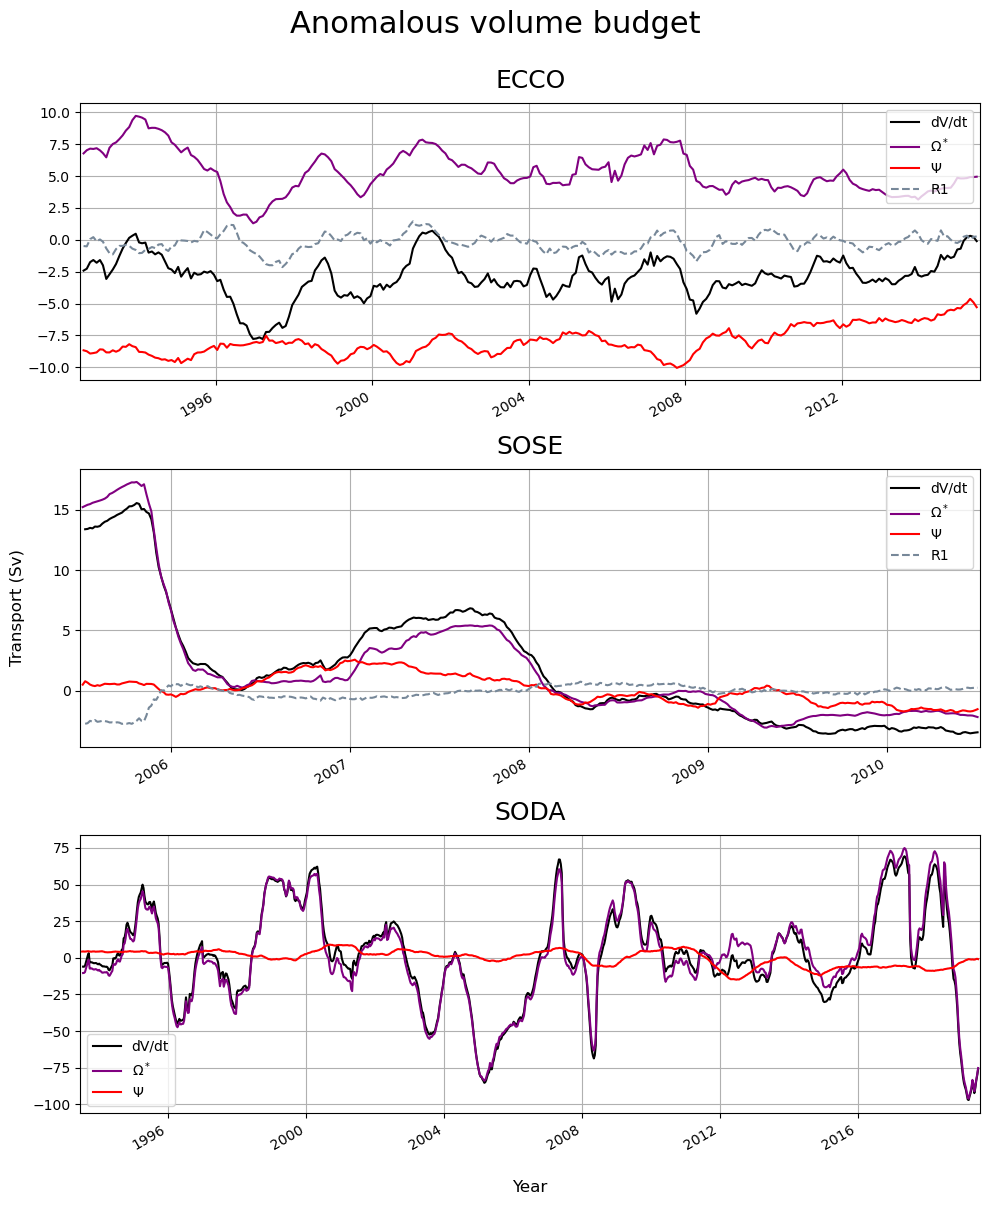

In [6]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(10,12), sharex=False)

bot_ecco.dVdt.plot(label='dV/dt', color='k', ax=ax0)
(bot_ecco.omega_trans_rate+bot_ecco.R2).plot(label=r'$\Omega^*$', color='purple', ax=ax0)
bot_ecco.psi_vel.plot(label=r'$\Psi$', color='red', ax=ax0)
bot_ecco.R1.plot(label='R1', color='lightslategray', linestyle='--', ax=ax0)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.legend()
ax0.grid()
ax0.set_title('ECCO', fontsize=18, pad=11)
ax0.set_xlim(bot_ecco.time[6], bot_ecco.time[-6]) #1992-07-15 to 2015-07-15

bot_sose.dVdt.plot(label='dV/dt', color='k', ax=ax1)
(bot_sose.omega_trans_rate+bot_sose.R2).plot(label=r'$\Omega^*$', color='purple', ax=ax1)
bot_sose.psi_vel.plot(label=r'$\Psi$', color='red', ax=ax1)
bot_sose.R1.plot(label='R1', color='lightslategray', linestyle='--', ax=ax1)
ax1.set_ylabel(r'Transport (Sv)', fontsize=12, labelpad=20)
ax1.set_title('SOSE', fontsize=18, pad=11)
ax1.set_xlabel('')
ax1.legend()
ax1.grid()
ax1.set_xlim(bot_sose.time[35], bot_sose.time[-36]) #2005-06-30 to 2010-07-09

(bot_soda.dVdt/1e6).plot(label='dV/dt', color='k', ax=ax2)
bot_soda.omega_trans.plot(label=r'$\Omega^*$', color='purple', ax=ax2)
bot_soda.psi_vel.plot(label=r'$\Psi$', color='red', ax=ax2)
ax2.grid()
ax2.legend()
ax2.set_ylabel('')
ax2.set_title('SODA', fontsize=18, pad=11)
ax2.set_xlabel('Year', fontsize=12, labelpad=20)
ax2.set_xlim(bot_soda.time[16], bot_soda.time[-16]) #1993-06-16 to 2019-07-20

plt.suptitle('Anomalous volume budget', fontsize=22, y=1)
plt.tight_layout()
plt.savefig('anom-stacked.pdf', transparent=True);

## $\Omega$'s components

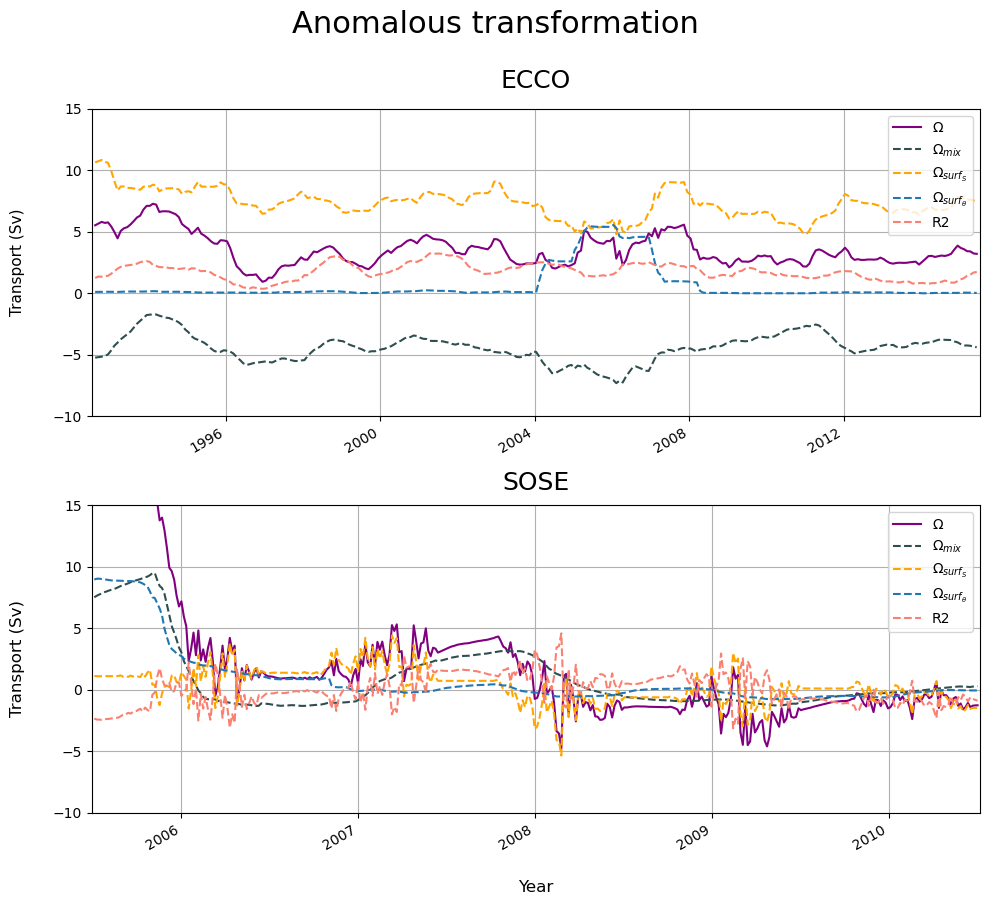

In [5]:
fig, (ax0,ax1) = plt.subplots(2,1, figsize=(10,9))

bot_ecco.omega_trans_rate.plot(label=r'$\Omega$', color='purple', ax=ax0)
bot_ecco.omega_mix.plot(label=r'$\Omega_{mix}$', color='darkslategrey', linestyle='dashed', ax=ax0)
bot_ecco.omega_surf_slt.plot(label=r'$\Omega_{surf_S}$', color='orange', linestyle='dashed', ax=ax0)
bot_ecco.omega_surf_th.plot(label=r'$\Omega_{surf_\theta}$', color='C0', linestyle='dashed', ax=ax0)
bot_ecco.R2.plot(label='R2', color='salmon', linestyle='--', ax=ax0)
ax0.set_xlabel('')
ax0.set_ylabel(r'Transport (Sv)', fontsize=11, labelpad=20)
ax0.legend()
ax0.grid()
ax0.set_title('ECCO', fontsize=18, pad=15)
ax0.set_ylim(-10,15)
ax0.set_xlim(bot_ecco.time[6], bot_ecco.time[-6]) #1992-07-15 to 2015-07-15

bot_sose.omega_trans_rate.plot(label=r'$\Omega$', color='purple', ax=ax1)
bot_sose.omega_mix.plot(label=r'$\Omega_{mix}$', color='darkslategrey', linestyle='dashed', ax=ax1)
bot_sose.omega_surf_slt.plot(label=r'$\Omega_{surf_S}$', color='orange', linestyle='dashed', ax=ax1)
bot_sose.omega_surf_th.plot(label=r'$\Omega_{surf_\theta}$', color='C0', linestyle='dashed', ax=ax1)
bot_sose.R2.plot(label='R2', color='salmon', linestyle='--', ax=ax1)
ax1.grid()
ax1.legend()
ax1.set_xlabel('Year', fontsize=12, labelpad=20)
ax1.set_ylabel(r'Transport (Sv)', fontsize=12, labelpad=20)
ax1.set_title('SOSE', fontsize=18, pad=11)
ax1.set_xlim(bot_sose.time[35], bot_sose.time[-36]) #2005-06-30 to 2010-07-09
ax1.set_ylim(-10,15)


plt.suptitle('Anomalous transformation', fontsize=22, y=1)
plt.tight_layout()
plt.savefig('anom-omegas-stacked.pdf', transparent=True);